**Multi - class Logistic Regression**: Here the target variable has more than two possible classes/categories. For example, salary of an employee can be categorized as 'low', 'medium' and 'high'. There are two types of multi - class logistic regression:
- Multinomial Logistic Regression
- Ordinal Logistic Regression

**Agenda**
- About Dataset
- Loading Libraries and Data
- Understanding the Data
- Separating Input and Output Variables
- Splitting Data into Train and Test Sets
- Build Model
- Prediction
- Check Model Performace

Given different physiochemical tests to predict the quality of wine in range 1 to 10.

In [1]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipultion tool

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# In read_csv() function, we have passed the location to where the files are located in the UCI website. The data is separated by ';'
# so we used separator as ';' (sep = ";")
red_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

In [3]:
# Red Wine
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**Input variables (based on physicochemical tests):**

fixed acidity\
volatile acidity\
citric acid\
residual sugar\
chlorides\
free sulfur dioxide\
total sulfur dioxide\
density\
pH\
sulphates\
alcohol

**Output variable (based on sensory data):**

quality (score between 0 and 10)

In [5]:
# Basic statistical details about data
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot: >

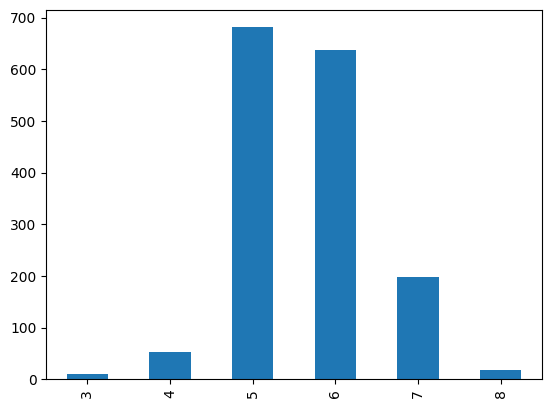

In [8]:
# plot the values of quality ordered by the quality
red_wine_data['quality'].value_counts().sort_index().plot(kind='bar')

# red_wine_data.quality.value_counts().plot(kind = 'bar')

We can observe here more wines are of average quality than poor quality and good quality. This is what we had observed in our EDA notebook of wine data.

### Separating Input Features and Output Features

In [9]:
# Input/independent variables
X = red_wine_data.drop('quality', axis = 1) # her we are droping the quality feature as this is the target and 'X' is input features, the changes are not
# made inplace as we have not used 'inplace = True'

y = red_wine_data.quality # Output/Dependent variable

In [10]:
# Let's check the shapes of X and y
print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (1599, 11) Dimension:  2
Shape:  (1599,) Dimension:  1


input variable must be a 2D array and target of 1D array

### Splitting the data into Train and Test Set

In [11]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [12]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.

# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

### Building Model

In [13]:
# import Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression()

### Prediction

In [14]:
predictions = log_model.predict(X_test)

compare actual target values (i.e. y_test) for X_test and the predicted value for X_test by our log_model.

### Model Performance

<AxesSubplot: >

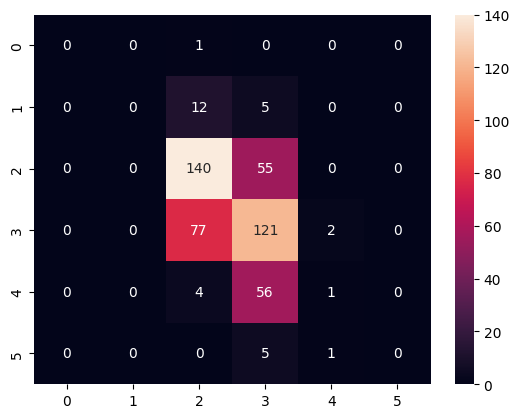

In [15]:
from sklearn.metrics import confusion_matrix

# confusion matrix
import seaborn as sns
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = 'd')


Again if you observe here, the class wise false positives (above the main diagonal) and the class wise false negatives (below the main diagonal) are almost symmetrical. So, the accuracy score is an important metric here.

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.5458333333333333

Our model is predicting 54.37% correct results.